In [2]:
# Import Data Set

import pandas as pd

file_path = r'C:\Users\chaconri\Desktop\Machine Learning\AAPL.csv'

AAPL_df = pd.read_csv(file_path)

AAPL_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [3]:
# Search for missing values

# Check for missing values and get a breakdown of missing values per column
missing_values = AAPL_df.isnull().sum()

# breakdown
print("Missing Values Per Column:")
print(missing_values)

Missing Values Per Column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
# Date column to numeric
AAPL_df['Numeric_Date'] = pd.factorize(AAPL_df['Date'])[0]

AAPL_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Numeric_Date
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,1
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,2
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,3
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,4


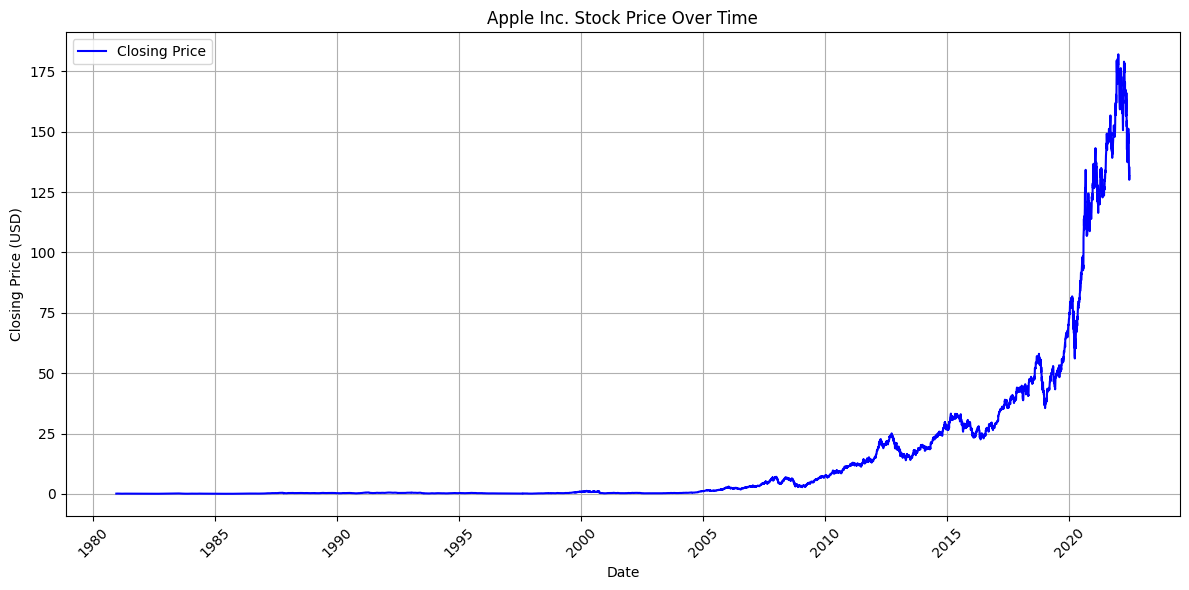

In [5]:
import matplotlib.pyplot as plt

# Convert the first column (index 0) to datetime
AAPL_df.iloc[:, 0] = pd.to_datetime(AAPL_df.iloc[:, 0])

# Set the date column as the DataFrame's index (optional but useful)
AAPL_df.set_index(AAPL_df.columns[0], inplace=True)

# Plot the closing prices over the entire time span
plt.figure(figsize=(12, 6))
plt.plot(AAPL_df.index, AAPL_df['Close'], label='Closing Price', color='b')
plt.title('Apple Inc. Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)

# Customize the x-axis ticks for better date display
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent cutoff labels
plt.show()

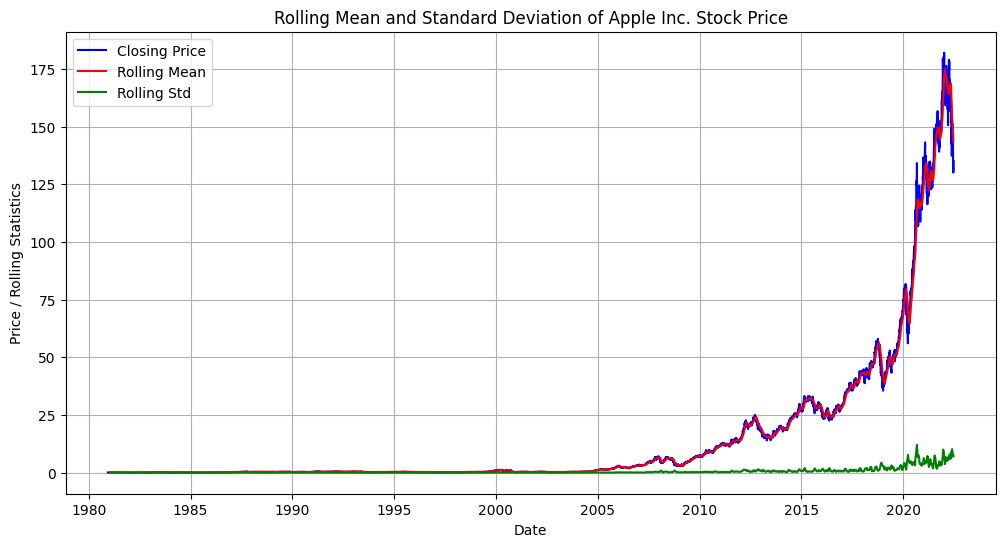

In [6]:
# Data Visualization
# Plot the rolling mean and rolling standard deviation to identify trends and seasonality
rolling_mean = AAPL_df['Close'].rolling(window=30).mean()
rolling_std = AAPL_df['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(AAPL_df.index, AAPL_df['Close'], label='Closing Price', color='b')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean', color='r')
plt.plot(rolling_std.index, rolling_std, label='Rolling Std', color='g')
plt.title('Rolling Mean and Standard Deviation of Apple Inc. Stock Price')
plt.xlabel('Date')
plt.ylabel('Price / Rolling Statistics')
plt.legend()
plt.grid(True)
plt.show()

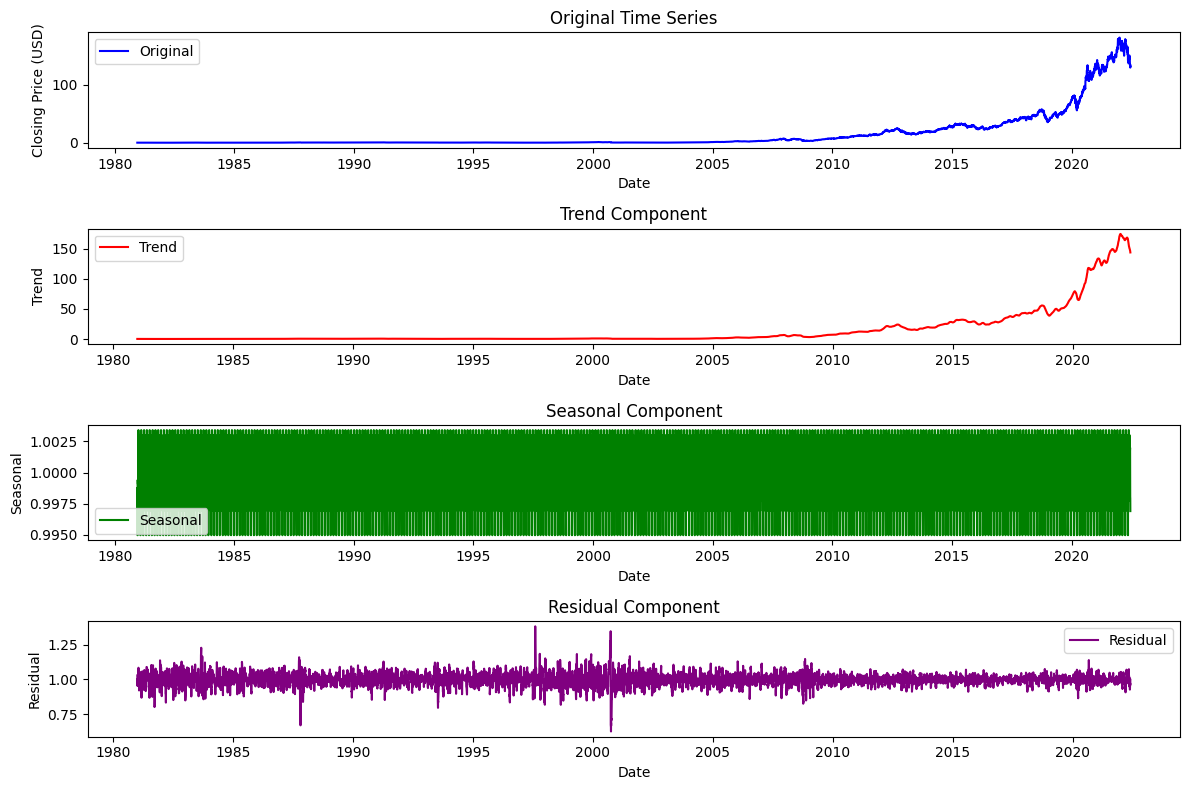

In [7]:
# Time Series Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(AAPL_df['Close'], model='multiplicative', period=30)  # Adjust the period as needed

# Plot the decomposed components
plt.figure(figsize=(12, 8))

# Original Time Series
plt.subplot(4, 1, 1)
plt.plot(AAPL_df.index, AAPL_df['Close'], label='Original', color='b')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(result.trend.index, result.trend, label='Trend', color='r')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal.index, result.seasonal, label='Seasonal', color='g')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(result.resid.index, result.resid, label='Residual', color='purple')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Stationarity Check

from statsmodels.tsa.stattools import adfuller

# Define a function to perform ADF test and display results
def adf_test(timeseries):
    # Perform ADF test
    result = adfuller(timeseries, autolag='AIC')
    
    # Extract ADF test results
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]

    # Display results
    print(f'ADF Statistic: {adf_statistic:.4f}')
    print(f'p-value: {p_value:.4f}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value:.4f}')

    # Interpret the results
    if p_value <= 0.05:
        print('Result: Stationary (Reject null hypothesis)')
    else:
        print('Result: Non-Stationary (Fail to reject null hypothesis)')

# Perform ADF test on the original data
print('ADF Test on Original Data:')
adf_test(AAPL_df['Close'])

# Apply differencing to make the data stationary (example: first-order differencing)
AAPL_df['Close_Differenced'] = AAPL_df['Close'] - AAPL_df['Close'].shift(1)
AAPL_df.dropna(inplace=True)

# Perform ADF test on differenced data
print('\nADF Test on Differenced Data:')
adf_test(AAPL_df['Close_Differenced'])

# Plot the differenced time series
plt.figure(figsize=(12, 6))
plt.plot(AAPL_df.index, AAPL_df['Close_Differenced'], label='Differenced Closing Price', color='b')
plt.title('Differenced Apple Inc. Stock Price')
plt.xlabel('Date')
plt.ylabel('Differenced Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
AAPL_df.head()

,Open,High,Low,Close,Adj Close,Volume,Numeric_Date
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,1
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,2
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,3
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,4


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
AAPL_df_scaled = scaler.fit_transform(AAPL_df)

# Convert the scaled array back to a DataFrame
AAPL_df_scaled = pd.DataFrame(AAPL_df_scaled, columns=AAPL_df.columns)

AAPL_df_scaled.head()

,Open,High,Low,Close,Adj Close,Volume,Numeric_Date
0,0.000431,0.000433,0.000443,0.000435,0.000341,0.063198,0.000000
1,0.000397,0.000397,0.000405,0.000399,0.000312,0.023699,0.000096
2,0.000348,0.000348,0.000355,0.000350,0.000274,0.014246,0.000191
3,0.000361,0.000363,0.000371,0.000365,0.000286,0.011647,0.000287
4,0.000379,0.000381,0.000390,0.000383,0.000300,0.009897,0.000382


*** Different Model Comparison ***

Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.42


C:\Users\chaconri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


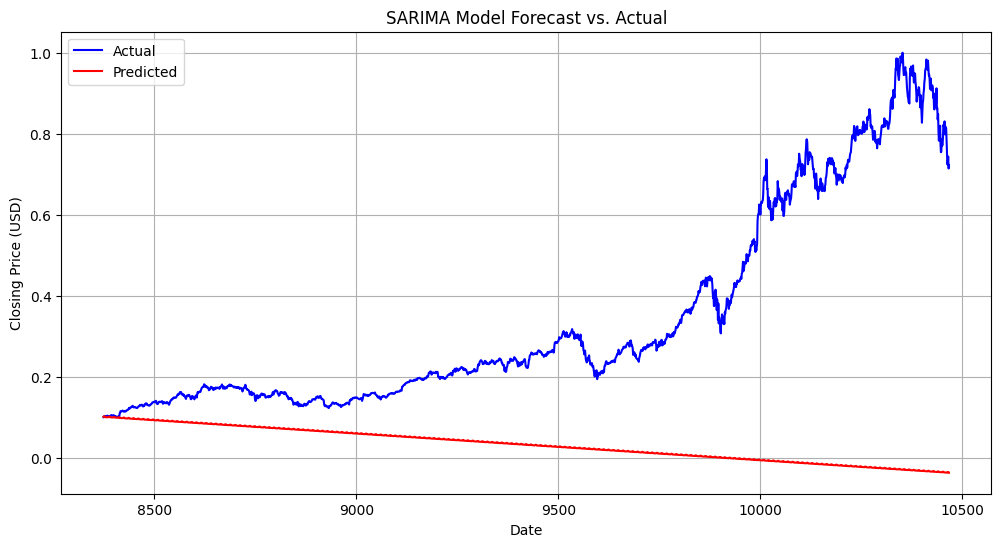

In [10]:
# Model SARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


# Split the data into training and testing sets
train_size = int(len(AAPL_df_scaled) * 0.8)  # 80% for training, 20% for testing
train_data, test_data = AAPL_df_scaled.iloc[:train_size], AAPL_df_scaled.iloc[train_size:]

# Define and fit the SARIMA model (adjust the order and seasonal_order as needed)
# Example orders: SARIMA(1, 1, 1)(1, 1, 1, 12) for seasonal data
order = (1, 1, 1)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Seasonal order (P, D, Q, S)

model = SARIMAX(train_data['Close'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Make predictions on the test set
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

# Evaluate the model using metrics like MAE, MSE, and RMSE
mae = mean_absolute_error(test_data['Close'], predictions)
mse = mean_squared_error(test_data['Close'], predictions)
rmse = sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Visualize the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual', color='b')
plt.plot(test_data.index, predictions, label='Predicted', color='r')
plt.title('SARIMA Model Forecast vs. Actual')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.33


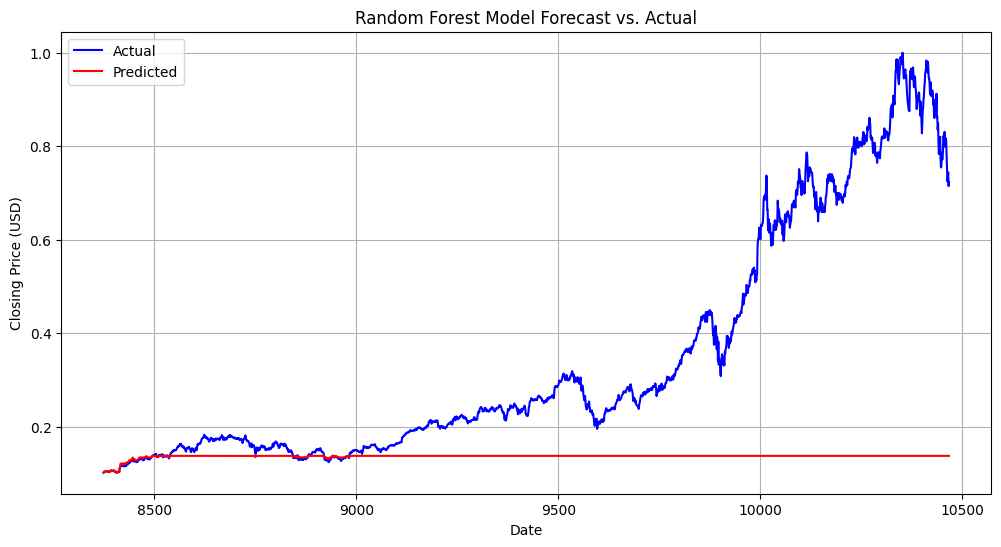

In [11]:
# Random Forest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0) 
model.fit(train_data.drop('Close', axis=1), train_data['Close'])  

# Make predictions on the test set
predictions = model.predict(test_data.drop('Close', axis=1))

# Evaluate the model using metrics like MAE, MSE, and RMSE
mae = mean_absolute_error(test_data['Close'], predictions)
mse = mean_squared_error(test_data['Close'], predictions)
rmse = sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Visualize the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual', color='b')
plt.plot(test_data.index, predictions, label='Predicted', color='r')
plt.title('Random Forest Model Forecast vs. Actual')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.33


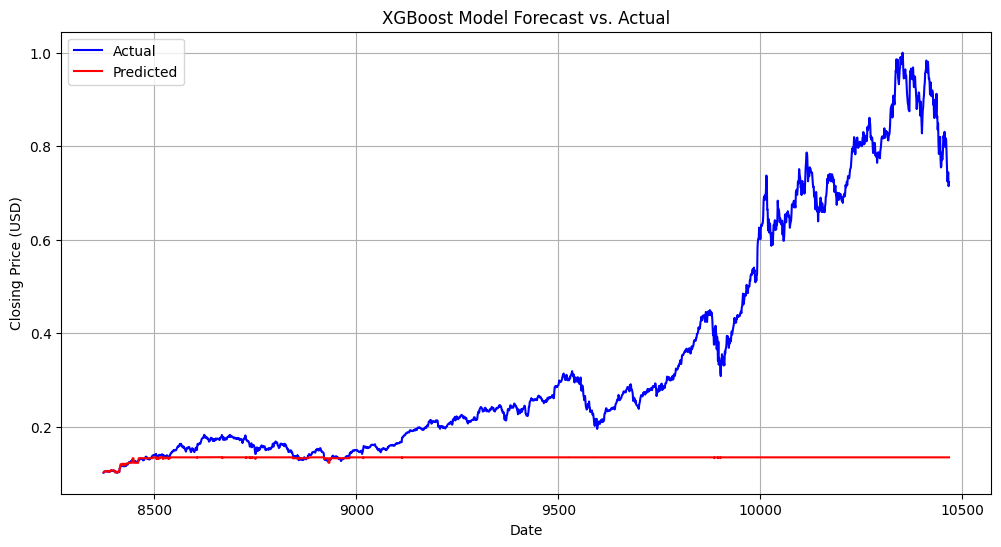

In [12]:
import xgboost as xgb

# Define the features (X) and target variable (y)
# Adjust the feature selection based on your dataset
X_train = train_data.drop('Close', axis=1)
y_train = train_data['Close']
X_test = test_data.drop('Close', axis=1)
y_test = test_data['Close']

# Create and train the XGBoost model (adjust hyperparameters as needed)
model = xgb.XGBRegressor(
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,       # Maximum depth of trees
    learning_rate=0.1  # Learning rate
)

model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using metrics like MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Visualize the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual', color='b')
plt.plot(test_data.index, predictions, label='Predicted', color='r')
plt.title('XGBoost Model Forecast vs. Actual')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Error absoluto medio (MAE): 0.01
Error cuadrático medio (MSE): 0.00
Raíz del error cuadrático medio (RMSE): 0.02


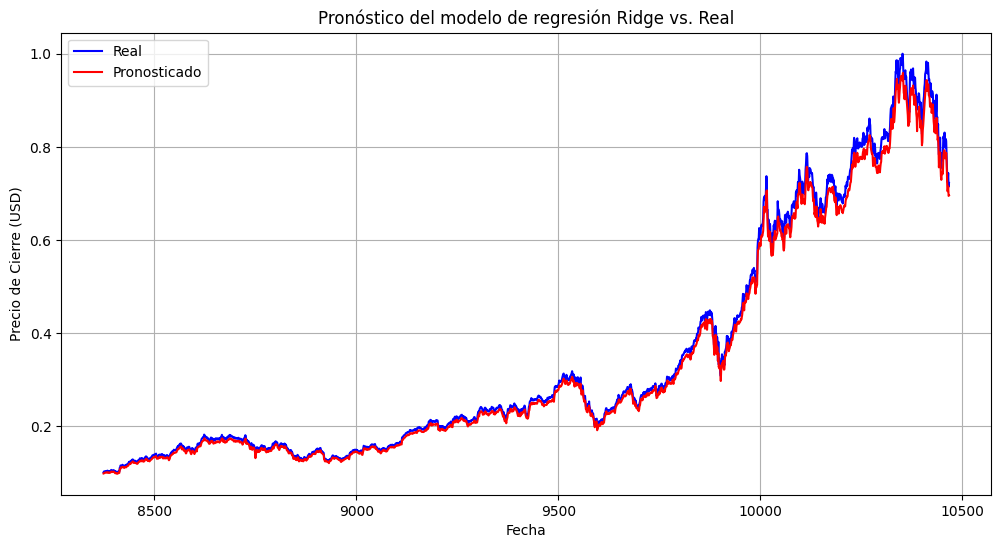

In [13]:
from sklearn.linear_model import Ridge



# Define las características (X) y la variable objetivo (y)
# Ajusta la selección de características según tu conjunto de datos
X_train = train_data.drop('Close', axis=1)
y_train = train_data['Close']
X_test = test_data.drop('Close', axis=1)
y_test = test_data['Close']

# Crea y entrena el modelo de regresión Ridge (ajusta el hiperparámetro alpha si es necesario)
alpha = 1.0  # Valor de penalización (ajusta según sea necesario)
model = Ridge(alpha=alpha)

model.fit(X_train, y_train)

# Realiza pronósticos en el conjunto de prueba
predictions = model.predict(X_test)

# Evalúa el modelo utilizando métricas como MAE, MSE y RMSE
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)

print(f'Error absoluto medio (MAE): {mae:.2f}')
print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Raíz del error cuadrático medio (RMSE): {rmse:.2f}')

# Visualiza los valores reales vs. los valores pronosticados
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Real', color='b')
plt.plot(test_data.index, predictions, label='Pronosticado', color='r')
plt.title('Pronóstico del modelo de regresión Ridge vs. Real')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Import Data Set

import pandas as pd

file_path = r'C:\Users\chaconri\Desktop\Machine Learning\AAPL.csv'

AAPL = pd.read_csv(file_path)

AAPL.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
